# Reducing Traffic Mortality

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
accidents_df = pd.read_csv('./datasets/road-accidents.csv', header=9, delimiter='|')
accidents_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [3]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [4]:
rows, columns = accidents_df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 51
Number of columns: 5


**Inference:**

There are 51 rows and 5 column in the dataset. No nulls values present in the dataset.

## Create a textual and a graphical summary of the data

In [5]:
accidents_df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


<Figure size 1080x576 with 0 Axes>

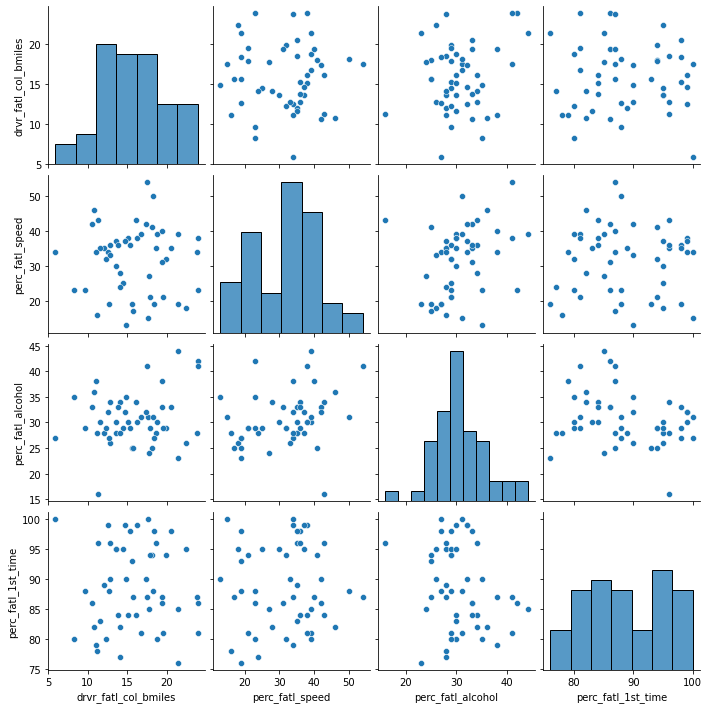

In [6]:
plt.figure(figsize=(15, 8))
sns.pairplot(accidents_df)

**Inference:**

All the features in the dataset are compared with one another. We can here observe that none of the feature is correlated with any other feature. Data points are either scattered across the plot or they are going in inverse direction because of weak correlation.


## Quantify the association of features and accidents

<b>Correlation Matrix</b>

In [7]:
matrix = accidents_df.corr()
matrix

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


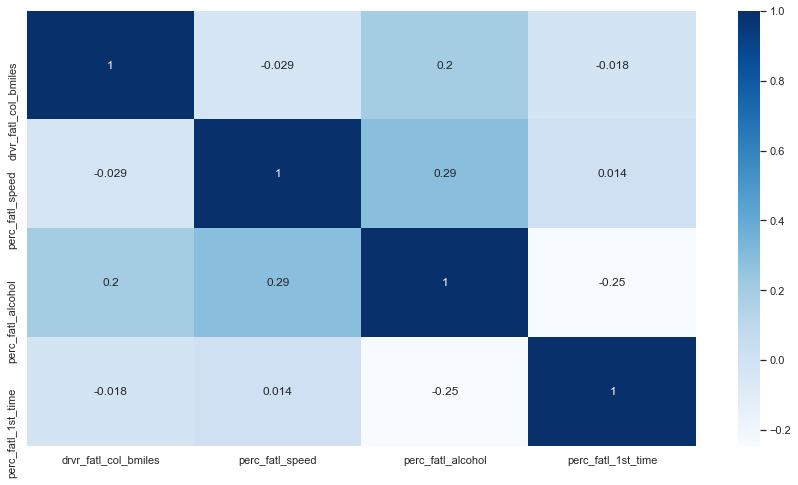

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

**Inference**

- There is no positive correlation between any of the features.
- The correlation between **drvr_fatl_col_bmiles** and **perc_fatl_1st_time** is -0.018, which indicates that they’re weakly negatively correlated. 
- The correlation between **perc_fatl_speed** and **perc_fatl_1st_time** is 0.014, which indicates that they’re basically not correlated. There is very little association between the 2 features.
- Correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself.


## Fit a multivariate linear regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_regression = LinearRegression()

<b>Divide into dependent & independent features<b>

In [11]:
accidents_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [12]:
X = accidents_df.iloc[:, 2:5]
y = accidents_df['drvr_fatl_col_bmiles']

In [13]:
X.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,39,30,80
1,41,25,94
2,35,28,96
3,18,26,95
4,35,28,89


In [14]:
y.head()

0    18.8
1    18.1
2    18.6
3    22.4
4    12.0
Name: drvr_fatl_col_bmiles, dtype: float64

<b>Split data to training and test set<b>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
41,31,33,86
27,13,35,90
35,28,34,82
34,23,42,86
7,38,30,99


In [18]:
y_test.head()

29    11.6
11    17.5
10    15.6
22    14.1
2     18.6
Name: drvr_fatl_col_bmiles, dtype: float64

<b>Fit the training set to LinearRegression model<b>

In [19]:
linear_reg = linear_regression.fit(X_train, y_train)
linear_reg

LinearRegression()

<b>Prediction<b>

In [20]:
prediction=linear_reg.predict(X_test)
prediction

array([15.73925232, 16.12193976, 15.80236078, 16.05287496, 15.40292435,
       15.75123639, 15.86813342, 15.78319857, 17.16238394, 15.45941962,
       15.6905138 ])

<b>Compare predicted results with real result<b>

In [21]:
from sklearn.metrics import r2_score

In [22]:
score = r2_score(y_test, prediction)

In [23]:
score

0.11654346208632727

**Inference**

Output is 0.116 which is far away from the value 1. It is nearer to zero. It means model built using LinearRegression is not good.

## Perform PCA on standardized data

<b>Split into training and test set<b>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<b>Standardize our feature set first<b>

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scalar=StandardScaler()

In [28]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [29]:
X_train

array([[ 2.58856357e-03,  5.12228609e-01, -4.37594974e-01],
       [-1.86117721e+00,  9.17954239e-01,  1.45864991e-01],
       [-3.08039065e-01,  7.15091424e-01, -1.02105494e+00],
       [-8.25751779e-01,  2.33799395e+00, -4.37594974e-01],
       [ 7.27386363e-01, -9.63598373e-02,  1.45864991e+00],
       [-6.18666693e-01, -2.99222653e-01,  8.75189949e-01],
       [-1.23992195e+00, -7.04948283e-01, -1.45864991e-01],
       [ 4.16758735e-01,  5.12228609e-01,  1.31278492e+00],
       [ 3.13216192e-01, -5.02085468e-01, -2.91729983e-01],
       [-1.03283686e+00, -2.99222653e-01, -1.16691993e+00],
       [-1.44700704e+00, -1.11067391e+00, -2.91729983e-01],
       [-1.23992195e+00, -7.04948283e-01,  1.31278492e+00],
       [-1.55054958e+00, -5.02085468e-01, -1.60451491e+00],
       [-4.11581608e-01, -1.31353673e+00, -5.83459966e-01],
       [ 9.34471449e-01,  1.52654269e+00, -2.91729983e-01],
       [ 3.13216192e-01,  3.09365793e-01,  1.45864991e+00],
       [ 1.14155653e+00,  3.09365793e-01

In [30]:
X_test

array([[ 0.41675873, -0.09635984, -0.87518995],
       [ 2.38406705,  2.13513113, -0.29172998],
       [-1.23992195, -1.11067391,  0.58345997],
       [-0.72220924, -0.50208547, -1.7503799 ],
       [ 0.41675873, -0.50208547,  1.02105494],
       [ 0.62384382,  0.30936579,  1.45864991],
       [-0.10095398, -0.09635984,  0.87518995],
       [ 0.10613111, -0.29922265, -1.31278492],
       [ 0.83092891,  2.74371958, -0.58345997],
       [ 0.41675873, -0.50208547,  0.        ],
       [ 0.83092891,  0.10650298, -1.16691993]])

<b>Applying PCA<b>

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA()
pca

PCA()

<b>Fit and transform training fetuare set<b>

In [33]:
X_train = pca.fit_transform(X_train)

In [34]:
X_train

array([[ 0.64602474,  0.17263965, -0.08198659],
       [ 0.03616144,  1.5125764 , -1.42783128],
       [ 1.07067316,  0.7085374 ,  0.02075435],
       [ 1.72587764,  0.78970898, -1.65447186],
       [-0.77925353, -1.32160968, -0.55870162],
       [-0.94480018,  0.15010301, -0.56838529],
       [-0.77302745,  1.20279862,  0.10648556],
       [-0.33735431, -1.01679993, -1.00587286],
       [-0.08870637, -0.10734318,  0.64491023],
       [ 0.22229959,  1.47704999,  0.53562538],
       [-1.0334716 ,  1.47857683,  0.3978433 ],
       [-1.69163105,  0.51526164, -0.7941364 ],
       [ 0.20278314,  2.15121855,  0.74959966],
       [-0.69880364,  0.71750965,  1.10998066],
       [ 1.55387094, -0.77807055, -0.51842758],
       [-0.60536693, -0.98204137, -0.99528728],
       [ 0.45926686, -1.09204852,  0.12899262],
       [-1.42930699, -0.9887278 , -0.38603552],
       [ 0.02251867, -0.9828048 , -0.92639624],
       [ 1.33299722, -0.79545204,  0.42885523],
       [-0.73438029, -0.93066917,  0.042

<b>Transform the test set<b>

In [35]:
X_test = pca.transform(X_test)

In [36]:
X_test

array([[ 0.60130327,  0.0517459 ,  0.76464844],
       [ 2.40942723, -2.09069415, -0.38900571],
       [-1.52516113,  0.88385704, -0.06409984],
       [ 0.53253405,  1.49118182,  1.153382  ],
       [-0.88571329, -0.81722527, -0.12643451],
       [-0.51615797, -1.25533778, -0.87764223],
       [-0.64970264, -0.31780446, -0.51217299],
       [ 0.64125946,  0.54371685,  1.05705277],
       [ 2.58635098, -0.62394507, -1.21669496],
       [-0.24269077, -0.33594938,  0.50400086],
       [ 1.05038521, -0.18755538,  0.96177012]])

<b>find explained variance ratio<b>

In [37]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43561095, 0.34322   , 0.22116905])

**Inference:**

We got variance ratios for each principal component. It can be derived that first principal component is responsible for 44% of the variance. Similarly, second principal component is responsible for 34% of the variance. Third principal component is responsible for 22% of the variance. Collectively we can see 100% of the classification information is captured by the 3 principal components.

<b>Using 1 principal component for training fetaure set<b>

In [38]:
pca = PCA(n_components=1)
x_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
X_train

array([[ 0.64602474,  0.17263965, -0.08198659],
       [ 0.03616144,  1.5125764 , -1.42783128],
       [ 1.07067316,  0.7085374 ,  0.02075435],
       [ 1.72587764,  0.78970898, -1.65447186],
       [-0.77925353, -1.32160968, -0.55870162],
       [-0.94480018,  0.15010301, -0.56838529],
       [-0.77302745,  1.20279862,  0.10648556],
       [-0.33735431, -1.01679993, -1.00587286],
       [-0.08870637, -0.10734318,  0.64491023],
       [ 0.22229959,  1.47704999,  0.53562538],
       [-1.0334716 ,  1.47857683,  0.3978433 ],
       [-1.69163105,  0.51526164, -0.7941364 ],
       [ 0.20278314,  2.15121855,  0.74959966],
       [-0.69880364,  0.71750965,  1.10998066],
       [ 1.55387094, -0.77807055, -0.51842758],
       [-0.60536693, -0.98204137, -0.99528728],
       [ 0.45926686, -1.09204852,  0.12899262],
       [-1.42930699, -0.9887278 , -0.38603552],
       [ 0.02251867, -0.9828048 , -0.92639624],
       [ 1.33299722, -0.79545204,  0.42885523],
       [-0.73438029, -0.93066917,  0.042

In [40]:
X_test

array([[ 0.60130327],
       [ 2.40942723],
       [-1.52516113],
       [ 0.53253405],
       [-0.88571329],
       [-0.51615797],
       [-0.64970264],
       [ 0.64125946],
       [ 2.58635098],
       [-0.24269077],
       [ 1.05038521]])

<b>Training and making Predictions<b>

Use random forest regressor to predict the test set.

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
classifier = RandomForestRegressor(max_depth=2, random_state=0)
classifier

RandomForestRegressor(max_depth=2, random_state=0)

In [83]:
from sklearn.datasets import make_regression
X_train, y_train = make_regression(n_features=1, n_informative=2, random_state=0, shuffle=False)

In [84]:
classifier.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [85]:
prediction = classifier.predict(X_test)
prediction

array([ 19.23868468,  64.98597424, -62.23770296,  17.49626384,
       -32.07739943, -17.70337928, -24.6346428 ,  19.23868468,
        64.98597424, -16.26724311,  48.53225482])

<b>Performance Evaluation<b>

In [87]:
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
score

-183.04701674316618

In [90]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

1565.2210091684935

Inference:

R2 Score value is negative meaning model fits our data badly. Higher mean squared error means higher the error in the model.

https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

<b>Results with 2 and 3 Principal Components<b>